In [5]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import warnings

# Configuración
warnings.filterwarnings('ignore')

In [6]:
# Carga de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df = pd.read_csv(url)
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [7]:
# Preprocesamiento
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
print(f"Frecuencia de los datos: {pd.infer_freq(df.index)}")

Frecuencia de los datos: D


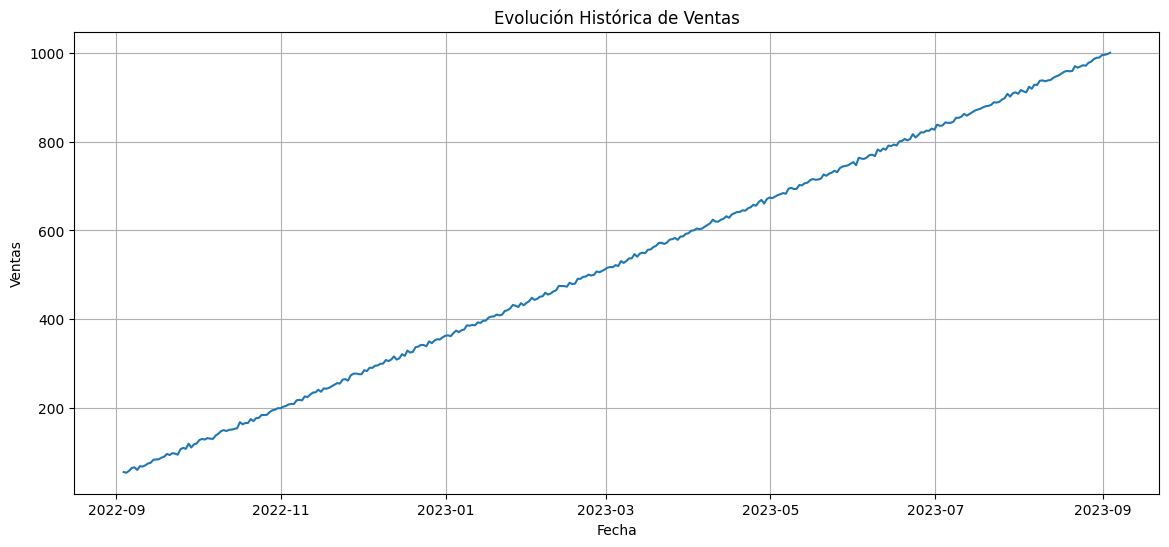

In [8]:
# Visualización inicial
plt.figure(figsize=(14, 6))
plt.plot(df['sales'])
plt.title('Evolución Histórica de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

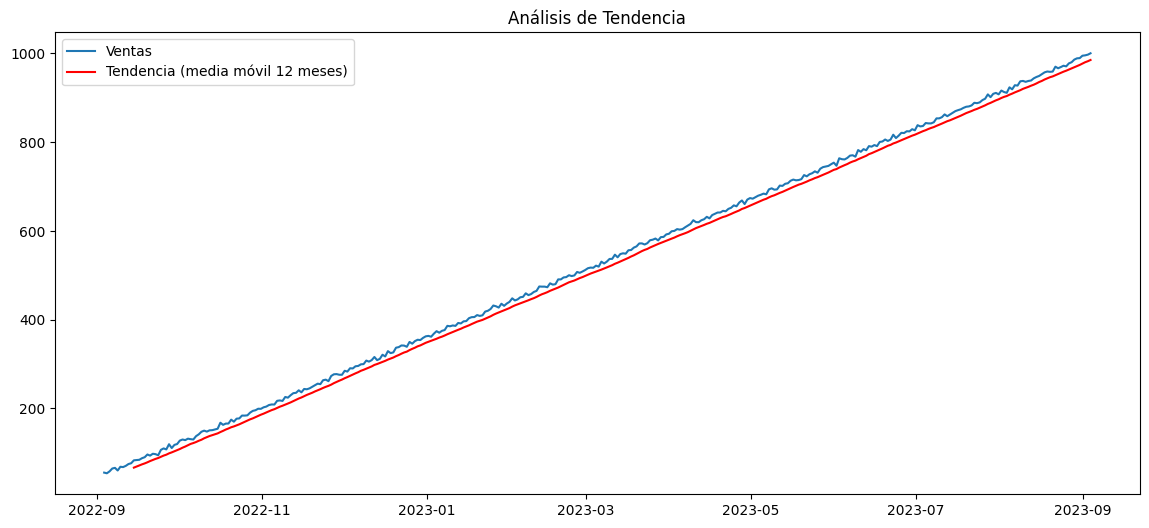

In [9]:
# Análisis de tendencia
rolling_mean = df.rolling(window=12).mean()
plt.figure(figsize=(14, 6))
plt.plot(df['sales'], label='Ventas')
plt.plot(rolling_mean['sales'], color='red', label='Tendencia (media móvil 12 meses)')
plt.title('Análisis de Tendencia')
plt.legend()
plt.show()

In [10]:
# Prueba de estacionariedad
result = adfuller(df['sales'])
print('Resultado Dickey-Fuller:')
print(f'p-valor: {result[1]:.4f}')
print('La serie es estacionaria' if result[1] < 0.05 else 'La serie NO es estacionaria')

Resultado Dickey-Fuller:
p-valor: 0.9862
La serie NO es estacionaria


<Figure size 1200x600 with 0 Axes>

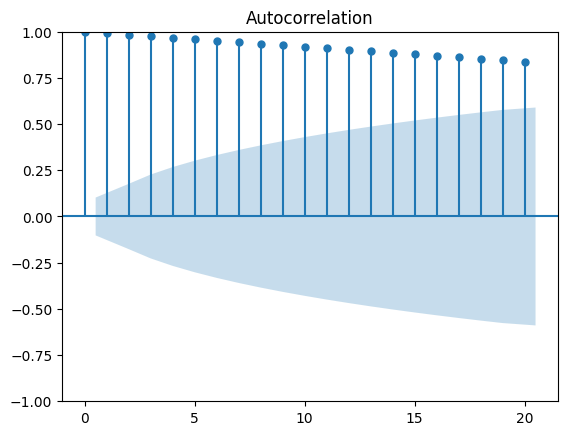

<Figure size 1200x600 with 0 Axes>

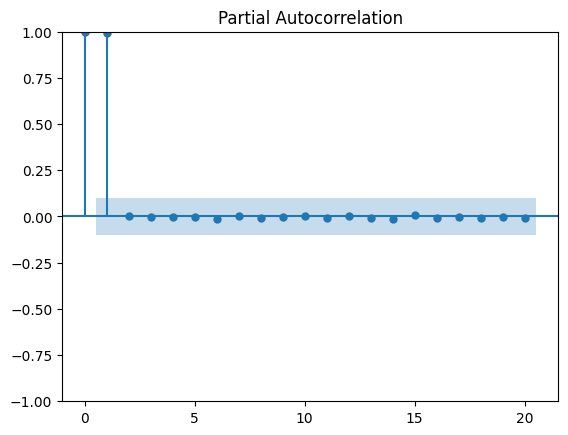

In [11]:
# ACF y PACF
plt.figure(figsize=(12, 6))
plot_acf(df['sales'], lags=20)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['sales'], lags=20)
plt.show()

In [12]:
# División train-test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
print(f"Entrenamiento: {len(train)} meses | Prueba: {len(test)} meses")

Entrenamiento: 292 meses | Prueba: 74 meses


In [13]:
# Modelado ARIMA
model = ARIMA(train['sales'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -838.546
Date:                Wed, 23 Jul 2025   AIC                           1683.092
Time:                        08:11:04   BIC                           1694.112
Sample:                    09-03-2022   HQIC                          1687.506
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1863.304      0.000       0.999       1.001
ma.L1         -0.9996      0.473     -2.111      0.035      -1.928      -0.072
sigma2        18.3520      8.857      2.072      0.0

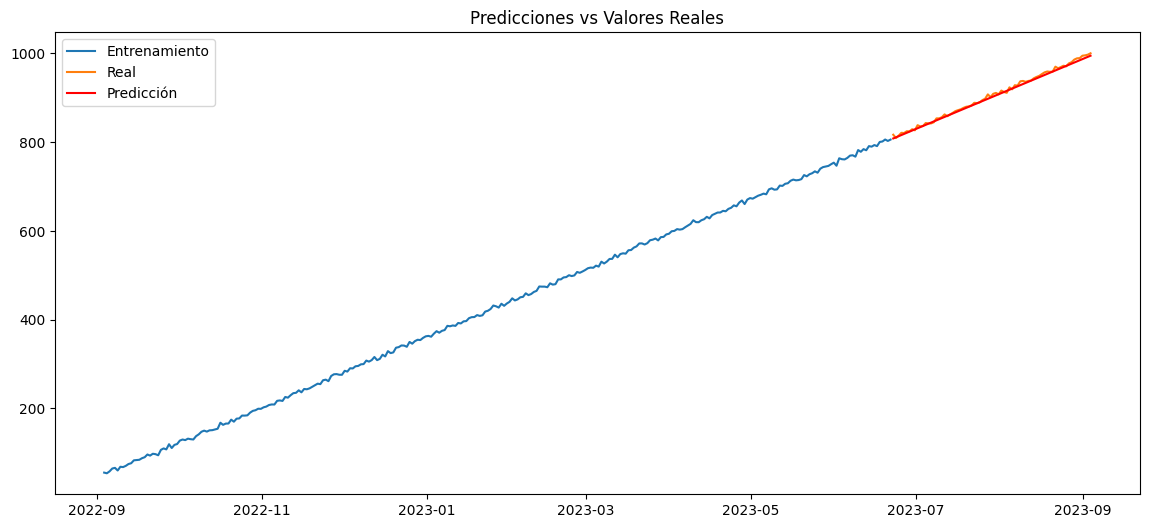

RMSE: 4.07
MAE: 3.29


In [14]:
# Evaluación
predictions = model_fit.forecast(steps=len(test))

plt.figure(figsize=(14, 6))
plt.plot(train.index, train['sales'], label='Entrenamiento')
plt.plot(test.index, test['sales'], label='Real')
plt.plot(test.index, predictions, label='Predicción', color='red')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()

print(f'RMSE: {np.sqrt(mean_squared_error(test["sales"], predictions)):.2f}')
print(f'MAE: {mean_absolute_error(test["sales"], predictions):.2f}')

In [15]:
# Guardar modelo
with open('../models/modelo_pronostico.pkl', 'wb') as f:
    pickle.dump(model_fit, f)
print("Modelo guardado correctamente")

Modelo guardado correctamente
